In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv('QVI_data.csv')

In [125]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [127]:
df.duplicated().sum()

1

In [128]:
df.drop_duplicates(inplace=True)

In [129]:
df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [131]:
df['Month_id'] = [''.join(x.split('-')[0:2]) for x in df.DATE]
df['Month_id'] = pd.to_numeric(df['Month_id'])

In [132]:
df['Month_id'].head()

0    201810
1    201809
2    201903
3    201903
4    201811
Name: Month_id, dtype: int64

In [143]:
df['unit_price'] = df['TOT_SALES']/df['PROD_QTY']
new_df = df.groupby(['STORE_NBR','Month_id']).agg({'TOT_SALES':'sum',
                                          'LYLTY_CARD_NBR':'nunique',
                                         'TXN_ID':'nunique',
                                         'PROD_QTY':'sum',
                                         'unit_price':'mean'})

In [144]:
new_df

TOT_SALES  LYLTY_CARD_NBR  TXN_ID  PROD_QTY  unit_price
STORE_NBR Month_id                                                         
1         201807        206.9              49      52        62    3.384615
          201808        176.1              42      43        54    3.329070
          201809        278.8              59      62        75    3.685484
          201810        188.1              44      45        58    3.288889
          201811        192.6              46      47        57    3.412766
...                       ...             ...     ...       ...         ...
272       201902        395.5              45      48        91    4.358333
          201903        442.3              50      53       101    4.350943
          201904        445.1              54      55       105    4.248214
          201905        314.6              34      40        71    4.437500
          201906        312.1              34      37        70    4.424324

[3169 rows x 5 columns]

In [145]:
new_df['Txnpercust']  = new_df['TXN_ID']/new_df['LYLTY_CARD_NBR']
new_df['Chipspercust'] = new_df['PROD_QTY']/new_df['LYLTY_CARD_NBR']

In [146]:
new_df = new_df[['TOT_SALES', 'LYLTY_CARD_NBR', 'unit_price', 'Txnpercust', 'Chipspercust']]
columns = ['Totsales', 'Customers', 'Unit_price', 'Txnpercust', 'Chipspercust']
new_df.columns = columns
new_df

Totsales  Customers  Unit_price  Txnpercust  Chipspercust
STORE_NBR Month_id                                                           
1         201807       206.9         49    3.384615    1.061224      1.265306
          201808       176.1         42    3.329070    1.023810      1.285714
          201809       278.8         59    3.685484    1.050847      1.271186
          201810       188.1         44    3.288889    1.022727      1.318182
          201811       192.6         46    3.412766    1.021739      1.239130
...                      ...        ...         ...         ...           ...
272       201902       395.5         45    4.358333    1.066667      2.022222
          201903       442.3         50    4.350943    1.060000      2.020000
          201904       445.1         54    4.248214    1.018519      1.944444
          201905       314.6         34    4.437500    1.176471      2.088235
          201906       312.1         34    4.424324    1.088235      2.058824

[3169 rows x 5 columns]

In [147]:
new_df = new_df.reset_index()
new_df

,STORE_NBR,Month_id,Totsales,Customers,Unit_price,Txnpercust,Chipspercust
0,1,201807,206.9,49,3.384615,1.061224,1.265306
1,1,201808,176.1,42,3.329070,1.023810,1.285714
2,1,201809,278.8,59,3.685484,1.050847,1.271186
3,1,201810,188.1,44,3.288889,1.022727,1.318182
4,1,201811,192.6,46,3.412766,1.021739,1.239130
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,4.358333,1.066667,2.022222
3165,272,201903,442.3,50,4.350943,1.060000,2.020000
3166,272,201904,445.1,54,4.248214,1.018519,1.944444
3167,272,201905,314.6,34,4.437500,1.176471,2.088235


In [148]:
new_df

,STORE_NBR,Month_id,Totsales,Customers,Unit_price,Txnpercust,Chipspercust
0,1,201807,206.9,49,3.384615,1.061224,1.265306
1,1,201808,176.1,42,3.329070,1.023810,1.285714
2,1,201809,278.8,59,3.685484,1.050847,1.271186
3,1,201810,188.1,44,3.288889,1.022727,1.318182
4,1,201811,192.6,46,3.412766,1.021739,1.239130
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,4.358333,1.066667,2.022222
3165,272,201903,442.3,50,4.350943,1.060000,2.020000
3166,272,201904,445.1,54,4.248214,1.018519,1.944444
3167,272,201905,314.6,34,4.437500,1.176471,2.088235


In [149]:
new_df = new_df.groupby('STORE_NBR').filter(lambda x: len(x) == 12)

In [150]:
new_df.shape

(3120, 7)

In [151]:
preTrialMeasures = new_df.loc[new_df['Month_id'] < 201902, :]
len(preTrialMeasures)

1820

In [152]:
preTrialMeasures.head()

,STORE_NBR,Month_id,Totsales,Customers,Unit_price,Txnpercust,Chipspercust
0,1,201807,206.9,49,3.384615,1.061224,1.265306
1,1,201808,176.1,42,3.329070,1.023810,1.285714
2,1,201809,278.8,59,3.685484,1.050847,1.271186
3,1,201810,188.1,44,3.288889,1.022727,1.318182
4,1,201811,192.6,46,3.412766,1.021739,1.239130


In [153]:
# Create a function which calculates the correlation between trial store and other stores based on a single metric

def calculateCorrelation(inputTable, metric, trial_store):
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Correlation': []})
    a = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        b = inputTable.loc[inputTable['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        output = output.append({'Store1': trial_store, 'Store2': i, 'Correlation': b.corr(a)}, ignore_index = True)
    return output

In [154]:
# Create another function which calculates a standardised magnitude difference 

def calculateMagnitudeDistance(inputTable, metric, trial_store):
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Magnitude' : []})
    a = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        b = inputTable.loc[inputTable['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        c = abs(a-b)
        d = np.mean(1-(c-min(c))/(max(c)-min(c)))
        output = output.append({'Store1': trial_store, 'Store2': i, 'Magnitude': d}, ignore_index = True)
    return output

In [156]:
# Now let's use those two functions to find the control store

# Compute correlation with trial store 77
trial_store = 77
corr_nSales = calculateCorrelation(preTrialMeasures, 'Totsales', trial_store)
corr_nCustomers = calculateCorrelation(preTrialMeasures, 'Customers', trial_store)

# Compute magnitude with trial store 77
magnitude_nSales = calculateMagnitudeDistance(preTrialMeasures, 'Totsales', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(preTrialMeasures, 'Customers', trial_store)

In [157]:
# Let's see what they look like

corr_nSales.head()

,Store1,Store2,Correlation
0,77.0,1.0,0.075218
1,77.0,2.0,-0.263079
2,77.0,3.0,0.806644
3,77.0,4.0,-0.263300
4,77.0,5.0,-0.110652


In [158]:
magnitude_nSales.head()

,Store1,Store2,Magnitude
0,77.0,1.0,0.408163
1,77.0,2.0,0.590119
2,77.0,3.0,0.522914
3,77.0,4.0,0.644934
4,77.0,5.0,0.516320


In [159]:
# Concatenate the scores together for 'nSales'

score_nSales = pd.concat([corr_nSales, magnitude_nSales['Magnitude']], axis = 1)

In [160]:
# Add an additional column which calculates the weighted average

corr_weight = 0.5
score_nSales['scoreNSales'] = corr_weight * score_nSales['Correlation'] + (1 - corr_weight) * score_nSales['Magnitude']
score_nSales.head()


,Store1,Store2,Correlation,Magnitude,scoreNSales
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


In [161]:
# Now do the same for 'nCustomers'

score_nCustomers = pd.concat([corr_nCustomers, magnitude_nCustomers['Magnitude']], axis = 1)
score_nCustomers.head()

,Store1,Store2,Correlation,Magnitude
0,77.0,1.0,0.322168,0.663866
1,77.0,2.0,-0.572051,0.471429
2,77.0,3.0,0.834207,0.489796
3,77.0,4.0,-0.295639,0.498258
4,77.0,5.0,0.370659,0.512605


In [162]:
# Again add a new column for weighted average

score_nCustomers['scoreNCust'] = corr_weight * score_nCustomers['Correlation'] + (1 - corr_weight) * score_nCustomers['Magnitude']
score_nCustomers.head()

,Store1,Store2,Correlation,Magnitude,scoreNCust
0,77.0,1.0,0.322168,0.663866,0.493017
1,77.0,2.0,-0.572051,0.471429,-0.050311
2,77.0,3.0,0.834207,0.489796,0.662002
3,77.0,4.0,-0.295639,0.498258,0.101310
4,77.0,5.0,0.370659,0.512605,0.441632


In [163]:
# Index both 'score_nSales' and 'score_nCustomers' dataframe

score_nSales.set_index(['Store1', 'Store2'], inplace = True)
score_nCustomers.set_index(['Store1', 'Store2'], inplace = True)

In [164]:
# Create a new dataframe 'score_Control' which takes the average of 'scoreNSales' and 'scoreNCust'

score_Control = pd.concat([score_nSales['scoreNSales'], score_nCustomers['scoreNCust']], axis = 1)
score_Control

scoreNSales  scoreNCust
Store1 Store2                         
77.0   1.0        0.241691    0.493017
       2.0        0.163520   -0.050311
       3.0        0.664779    0.662002
       4.0        0.190817    0.101310
       5.0        0.202834    0.441632
...                    ...         ...
       268.0      0.387272    0.470473
       269.0      0.121684    0.005090
       270.0      0.453489    0.202710
       271.0      0.348289    0.174100
       272.0      0.320626    0.384336

[260 rows x 2 columns]

In [165]:
# Add a new column to 'score_Control' which computes the average of 'scoreNSales' and 'scoreNCust'

score_Control['finalControlScore'] = 0.5 * (score_Control['scoreNSales'] + score_Control['scoreNCust'])
score_Control.head()

scoreNSales  scoreNCust  finalControlScore
Store1 Store2                                            
77.0   1.0        0.241691    0.493017           0.367354
       2.0        0.163520   -0.050311           0.056604
       3.0        0.664779    0.662002           0.663390
       4.0        0.190817    0.101310           0.146064
       5.0        0.202834    0.441632           0.322233

In [166]:
# Let's see the top 5 stores with highest 'finalControlScore'

score_Control.sort_values(by = 'finalControlScore', ascending = False).head()

# Comment: store 233 matches trial store 77 the mos

scoreNSales  scoreNCust  finalControlScore
Store1 Store2                                            
77.0   233.0      0.697290    0.816607           0.756949
       71.0       0.789497    0.663123           0.726310
       84.0       0.656972    0.715000           0.685986
       119.0      0.636046    0.729729           0.682887
       115.0      0.708347    0.645155           0.676751

In [167]:
# Now that we have found a control store, let's check visually if the drivers are indeed similar to store 77 before the trial period
# Set store 233 as 'control_store'

control_store = 233

In [168]:
# Create a new dataframe 'pastSales'
pastSales = preTrialMeasures

# Create a new column within 'pastSales' which categorises store type
store_type = []

for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

pastSales['store_type'] = store_type
pastSales.head()

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_18488/1392886785.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['store_type'] = store_type


,STORE_NBR,Month_id,Totsales,Customers,Unit_price,Txnpercust,Chipspercust,store_type
0,1,201807,206.9,49,3.384615,1.061224,1.265306,Other Stores
1,1,201808,176.1,42,3.329070,1.023810,1.285714,Other Stores
2,1,201809,278.8,59,3.685484,1.050847,1.271186,Other Stores
3,1,201810,188.1,44,3.288889,1.022727,1.318182,Other Stores
4,1,201811,192.6,46,3.412766,1.021739,1.239130,Other Stores


In [173]:
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['Month_id'].astype(str), format = '%Y%m')
pastSales.head()

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_18488/4288989331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['TransactionMonth'] = pd.to_datetime(pastSales['Month_id'].astype(str), format = '%Y%m')


,STORE_NBR,Month_id,Totsales,Customers,Unit_price,Txnpercust,Chipspercust,store_type,TransactionMonth
0,1,201807,206.9,49,3.384615,1.061224,1.265306,Other Stores,2018-07-01
1,1,201808,176.1,42,3.329070,1.023810,1.285714,Other Stores,2018-08-01
2,1,201809,278.8,59,3.685484,1.050847,1.271186,Other Stores,2018-09-01
3,1,201810,188.1,44,3.288889,1.022727,1.318182,Other Stores,2018-10-01
4,1,201811,192.6,46,3.412766,1.021739,1.239130,Other Stores,2018-11-01


In [176]:
# Now create 'totSales' visualisation for control store, trial store and other stores

# First create relevant dataframes 
controlSalesPlot = pastSales.loc[pastSales['store_type'] == 'Control Store', ['TransactionMonth', 'Totsales']]
controlSalesPlot.set_index('TransactionMonth', inplace = True)
controlSalesPlot.rename(columns = {'Totsales': 'Control Store'}, inplace = True)
trialSalesPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['TransactionMonth', 'Totsales']]
trialSalesPlot.set_index('TransactionMonth', inplace = True)
trialSalesPlot.rename(columns = {'Totsales': 'Trial Store'}, inplace = True)
otherSalesPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['TransactionMonth', 'Totsales']]
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TransactionMonth').Totsales.mean())
otherSalesPlot.rename(columns = {'Totsales': 'Other Stores'}, inplace = True)

# Concatenate
combineSalesPlot = pd.concat([controlSalesPlot, trialSalesPlot, otherSalesPlot], axis = 1)
combineSalesPlot

,Control Store,Trial Store,Other Stores
TransactionMonth,,,
2018-07-01,290.7,296.8,638.004651
2018-08-01,285.9,255.5,610.223450
2018-09-01,228.6,225.2,620.198450
2018-10-01,185.7,204.5,635.291473
2018-11-01,211.6,245.3,618.864341
2018-12-01,279.8,267.3,648.453876
2019-01-01,177.5,204.4,628.684496


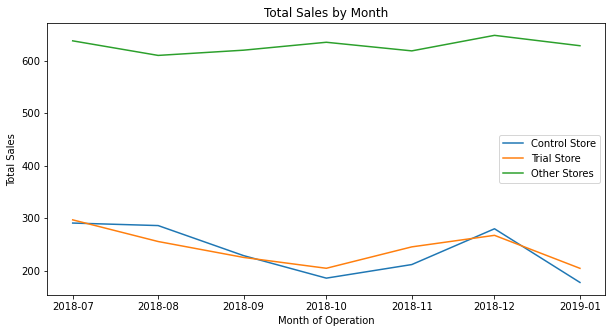

In [177]:
# Plot total sales by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(combineSalesPlot)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

In [178]:
# Do the same for 'nCustomers' 

# First create relevant dataframes 
controlCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Control Store', ['TransactionMonth', 'Customers']]
controlCustomersPlot.set_index('TransactionMonth', inplace = True)
controlCustomersPlot.rename(columns = {'Customers': 'Control Store'}, inplace = True)
trialCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['TransactionMonth', 'Customers']]
trialCustomersPlot.set_index('TransactionMonth', inplace = True)
trialCustomersPlot.rename(columns = {'Customers': 'Trial Store'}, inplace = True)
otherCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['TransactionMonth', 'Customers']]
otherCustomersPlot = pd.DataFrame(otherCustomersPlot.groupby('TransactionMonth').Customers.mean())
otherCustomersPlot.rename(columns = {'Customers': 'Other Stores'}, inplace = True)

# Concatenate
combineCustomersPlot = pd.concat([controlCustomersPlot, trialCustomersPlot, otherCustomersPlot], axis = 1)
combineCustomersPlot

,Control Store,Trial Store,Other Stores
TransactionMonth,,,
2018-07-01,51,51,72.333333
2018-08-01,48,47,72.120155
2018-09-01,42,42,70.131783
2018-10-01,35,37,71.608527
2018-11-01,40,41,70.534884
2018-12-01,47,46,73.515504
2019-01-01,35,35,71.240310


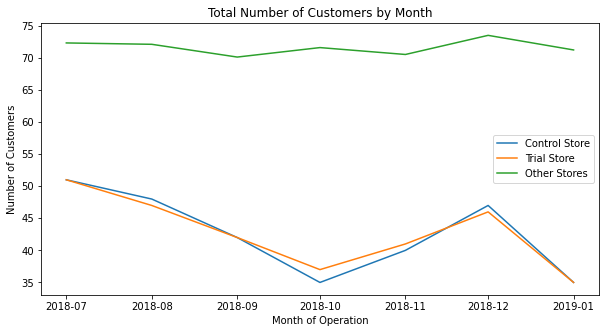

In [179]:
# Plot total number of customers for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(combineCustomersPlot)
plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

In [181]:
# First we need to work out a scaling factor to applied to the control store
# We compute this by dividing sum of 'totSales' for trial store by sum of 'totSales' for control store
# Let's call this variable 'scalingFactorSales'

trial_sum = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Trial Store' , 'Totsales'].sum()
control_sum = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Control Store', 'Totsales'].sum()
scalingFactorSales = trial_sum / control_sum
scalingFactorSales

1.023617303289553

In [182]:
# Create dataframe and reset index

scaledControlSales = new_df
scaledControlSales.head()

,STORE_NBR,Month_id,Totsales,Customers,Unit_price,Txnpercust,Chipspercust
0,1,201807,206.9,49,3.384615,1.061224,1.265306
1,1,201808,176.1,42,3.329070,1.023810,1.285714
2,1,201809,278.8,59,3.685484,1.050847,1.271186
3,1,201810,188.1,44,3.288889,1.022727,1.318182
4,1,201811,192.6,46,3.412766,1.021739,1.239130


In [183]:
# We only want control store i.e. store 233

scaledControlSales = scaledControlSales.loc[scaledControlSales['STORE_NBR'] == control_store]
scaledControlSales

,STORE_NBR,Month_id,Totsales,Customers,Unit_price,Txnpercust,Chipspercust
2699,233,201807,290.7,51,3.344444,1.058824,1.725490
2700,233,201808,285.9,48,3.528000,1.041667,1.666667
2701,233,201809,228.6,42,3.277778,1.071429,1.666667
2702,233,201810,185.7,35,3.319444,1.028571,1.600000
2703,233,201811,211.6,40,3.487805,1.025000,1.550000
2704,233,201812,279.8,47,3.694000,1.063830,1.595745
2705,233,201901,177.5,35,3.717143,1.000000,1.342857
2706,233,201902,244.0,45,3.491489,1.044444,1.555556
2707,233,201903,199.1,40,3.373171,1.025000,1.475000
2708,233,201904,158.6,30,3.436364,1.066667,1.533333


In [184]:
# Create 'controlSales' which applies 'scalingFactorSales' to 'totSales' column

scaledControlSales['controlSales'] = scaledControlSales['Totsales'] * scalingFactorSales

# Create 'percentageDiff' dataframe
percentageDiff = scaledControlSales[['Month_id', 'controlSales']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'totSales'
trialSales = new_df.loc[new_df['STORE_NBR'] == trial_store, 'Totsales']
trialSales.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialSales], axis = 1)
percentageDiff.rename(columns = {'Totsales': 'trialSales'}, inplace = True)

percentageDiff

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_18488/3462169124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['controlSales'] = scaledControlSales['Totsales'] * scalingFactorSales


,Month_id,controlSales,trialSales
0,201807,297.565550,296.8
1,201808,292.652187,255.5
2,201809,233.998916,225.2
3,201810,190.085733,204.5
4,201811,216.597421,245.3
5,201812,286.408121,267.3
6,201901,181.692071,204.4
7,201902,249.762622,235.0
8,201903,203.802205,278.5
9,201904,162.345704,263.5


In [185]:
# Calculate percentage difference and put it in a new column

percentageDiff['percentageDiff'] = abs(percentageDiff.controlSales - percentageDiff.trialSales) / percentageDiff.controlSales
percentageDiff

,Month_id,controlSales,trialSales,percentageDiff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516
5,201812,286.408121,267.3,0.066716
6,201901,181.692071,204.4,0.124980
7,201902,249.762622,235.0,0.059107
8,201903,203.802205,278.5,0.366521
9,201904,162.345704,263.5,0.623080


In [187]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = percentageDiff.loc[percentageDiff['Month_id'] < 201902, 'percentageDiff'].std()
stdDev

0.04994076264142537

In [189]:
dof=7
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['Month_id'] > 201901) & (percentageDiff['Month_id'] < 201905), 'tValue']

7     1.183534
8     7.339116
9    12.476373
Name: tValue, dtype: float64

In [191]:
from scipy.stats import t
t.isf(0.05, dof)

1.8945786050613054

In [192]:
scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['Month_id'].astype(str), format = '%Y%m')
controlSales = scaledControlSales.loc[:, ['TransactionMonth', 'controlSales']]
controlSales.set_index('TransactionMonth', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)
controlSales

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_18488/2194683035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['Month_id'].astype(str), format = '%Y%m')


,Control Sales
TransactionMonth,
2018-07-01,297.565550
2018-08-01,292.652187
2018-09-01,233.998916
2018-10-01,190.085733
2018-11-01,216.597421
2018-12-01,286.408121
2019-01-01,181.692071
2019-02-01,249.762622
2019-03-01,203.802205


In [196]:
trialSales = pastSales.loc[pastSales['STORE_NBR'] == trial_store, ['TransactionMonth', 'Totsales']]
trialSales.set_index('TransactionMonth', inplace = True)
trialSales.rename(columns = {'Totsales': 'Trial Sales'}, inplace = True)
trialSales

,Trial Sales
TransactionMonth,
2018-07-01,296.8
2018-08-01,255.5
2018-09-01,225.2
2018-10-01,204.5
2018-11-01,245.3
2018-12-01,267.3
2019-01-01,204.4


In [197]:
controlSales['Control 5% Confidence Interval'] = controlSales['Control Sales'] * (1 - stdDev*2)
controlSales['Control 95% Confidence Interval'] = controlSales['Control Sales'] * (1 + stdDev*2)
controlSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval
TransactionMonth,,,
2018-07-01,297.565550,267.844249,327.286851
2018-08-01,292.652187,263.421640,321.882734
2018-09-01,233.998916,210.626747,257.371084
2018-10-01,190.085733,171.099680,209.071786
2018-11-01,216.597421,194.963341,238.231502
2018-12-01,286.408121,257.801241,315.015001
2019-01-01,181.692071,163.544390,199.839753
2019-02-01,249.762622,224.815950,274.709294
2019-03-01,203.802205,183.446130,224.158280


In [198]:
combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales

,Control Sales,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Sales
TransactionMonth,,,,
2018-07-01,297.565550,267.844249,327.286851,296.8
2018-08-01,292.652187,263.421640,321.882734,255.5
2018-09-01,233.998916,210.626747,257.371084,225.2
2018-10-01,190.085733,171.099680,209.071786,204.5
2018-11-01,216.597421,194.963341,238.231502,245.3
2018-12-01,286.408121,257.801241,315.015001,267.3
2019-01-01,181.692071,163.544390,199.839753,204.4


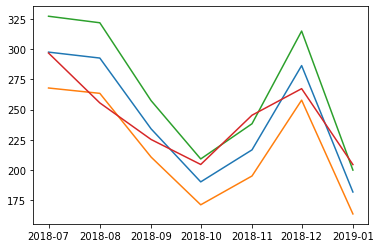

In [199]:
plt.plot(combineSales)

In [201]:
# Now let's move on to 'nCustomers'
# First, compute scaling factor
# Let's call this variable 'scalingFactorCustomers'

trial_customers = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Trial Store' , 'Customers'].sum()
control_customers = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Control Store', 'Customers'].sum()
scalingFactorCustomers = trial_customers / control_customers
scalingFactorCustomers

1.0033557046979866

In [202]:
scaledControlCustomers = pastSales
scaledControlCustomers = scaledControlCustomers.loc[scaledControlCustomers['STORE_NBR'] == control_store]
scaledControlCustomers.head()

,STORE_NBR,Month_id,Totsales,Customers,Unit_price,Txnpercust,Chipspercust,store_type,TransactionMonth
2699,233,201807,290.7,51,3.344444,1.058824,1.725490,Control Store,2018-07-01
2700,233,201808,285.9,48,3.528000,1.041667,1.666667,Control Store,2018-08-01
2701,233,201809,228.6,42,3.277778,1.071429,1.666667,Control Store,2018-09-01
2702,233,201810,185.7,35,3.319444,1.028571,1.600000,Control Store,2018-10-01
2703,233,201811,211.6,40,3.487805,1.025000,1.550000,Control Store,2018-11-01


In [203]:
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['Customers'] * scalingFactorCustomers
scaledControlCustomers.head()

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_18488/2961434744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCustomers['controlCustomers'] = scaledControlCustomers['Customers'] * scalingFactorCustomers


,STORE_NBR,Month_id,Totsales,Customers,Unit_price,Txnpercust,Chipspercust,store_type,TransactionMonth,controlCustomers
2699,233,201807,290.7,51,3.344444,1.058824,1.725490,Control Store,2018-07-01,51.171141
2700,233,201808,285.9,48,3.528000,1.041667,1.666667,Control Store,2018-08-01,48.161074
2701,233,201809,228.6,42,3.277778,1.071429,1.666667,Control Store,2018-09-01,42.140940
2702,233,201810,185.7,35,3.319444,1.028571,1.600000,Control Store,2018-10-01,35.117450
2703,233,201811,211.6,40,3.487805,1.025000,1.550000,Control Store,2018-11-01,40.134228


In [205]:
# Create 'percentageDiff' dataframe
percentageDiff = scaledControlCustomers[['Month_id', 'controlCustomers']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trialCustomers = new_df.loc[new_df['STORE_NBR'] == trial_store, 'Customers']
trialCustomers.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialCustomers], axis = 1)
percentageDiff.rename(columns = {'Customers': 'trialCustomers'}, inplace = True)

percentageDiff

,Month_id,controlCustomers,trialCustomers
0,201807.0,51.171141,51
1,201808.0,48.161074,47
2,201809.0,42.140940,42
3,201810.0,35.117450,37
4,201811.0,40.134228,41
5,201812.0,47.157718,46
6,201901.0,35.117450,35
7,NaN,NaN,45
8,NaN,NaN,50
9,NaN,NaN,47


In [206]:
percentageDiff['percentageDiff'] = abs(percentageDiff.controlCustomers - percentageDiff.trialCustomers) / percentageDiff.controlCustomers
percentageDiff


,Month_id,controlCustomers,trialCustomers,percentageDiff
0,201807.0,51.171141,51,0.003344
1,201808.0,48.161074,47,0.024108
2,201809.0,42.140940,42,0.003344
3,201810.0,35.117450,37,0.053607
4,201811.0,40.134228,41,0.021572
5,201812.0,47.157718,46,0.024550
6,201901.0,35.117450,35,0.003344
7,NaN,NaN,45,NaN
8,NaN,NaN,50,NaN
9,NaN,NaN,47,NaN


In [209]:
# Our null hypothesis is such that the trial period is the same as the pre-trial period
# Let's take the standard deviation based on the scaled percentage difference in the pre-trial period

stdDev = percentageDiff.loc[percentageDiff['Month_id'] < 201902, 'percentageDiff'].std()
stdDev

0.01824074855824395

In [210]:
# Time for some visualisation
# First we need to create the appropriate dataframe
# Extract 'controlCustomers' from 'scaledControlCustomers' dataframe for control store 

controlCustomers = scaledControlCustomers.loc[:, ['TransactionMonth', 'controlCustomers']]
controlCustomers.set_index('TransactionMonth', inplace = True)
controlCustomers.rename(columns = {'controlCustomers': 'Control Customers'}, inplace = True)
controlCustomers

,Control Customers
TransactionMonth,
2018-07-01,51.171141
2018-08-01,48.161074
2018-09-01,42.140940
2018-10-01,35.117450
2018-11-01,40.134228
2018-12-01,47.157718
2019-01-01,35.117450


In [211]:
trialCustomers = pastSales.loc[pastSales['STORE_NBR'] == trial_store, ['TransactionMonth', 'Customers']]
trialCustomers.set_index('TransactionMonth', inplace = True)
trialCustomers.rename(columns = {'Customers': 'Trial Customers'}, inplace = True)
trialCustomers

,Trial Customers
TransactionMonth,
2018-07-01,51
2018-08-01,47
2018-09-01,42
2018-10-01,37
2018-11-01,41
2018-12-01,46
2019-01-01,35


In [212]:
# Create two new columns under 'controlCustomers' which calculates the 5% and 95% confidence interval

controlCustomers['Control 5% Confidence Interval'] = controlCustomers['Control Customers'] * (1 - stdDev*2)
controlCustomers['Control 95% Confidence Interval'] = controlCustomers['Control Customers'] * (1 + stdDev*2)
controlCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval
TransactionMonth,,,
2018-07-01,51.171141,49.304341,53.037941
2018-08-01,48.161074,46.404086,49.918062
2018-09-01,42.140940,40.603575,43.678304
2018-10-01,35.117450,33.836313,36.398587
2018-11-01,40.134228,38.670071,41.598385
2018-12-01,47.157718,45.437334,48.878102
2019-01-01,35.117450,33.836313,36.398587


In [213]:
# Merge the two dataframes together 'controlSales' and 'trialSales'

combineCustomers = pd.merge(controlCustomers, trialCustomers, left_index = True, right_index = True)
combineCustomers

,Control Customers,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Customers
TransactionMonth,,,,
2018-07-01,51.171141,49.304341,53.037941,51
2018-08-01,48.161074,46.404086,49.918062,47
2018-09-01,42.140940,40.603575,43.678304,42
2018-10-01,35.117450,33.836313,36.398587,37
2018-11-01,40.134228,38.670071,41.598385,41
2018-12-01,47.157718,45.437334,48.878102,46
2019-01-01,35.117450,33.836313,36.398587,35


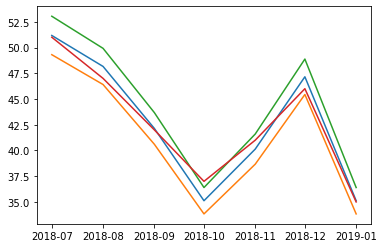

In [214]:
plt.plot(combineCustomers)

In [220]:
trial_store = 86
corr_nSales = calculateCorrelation(preTrialMeasures, 'Totsales', trial_store)
corr_nCustomers = calculateCorrelation(preTrialMeasures, 'Customers', trial_store)

# Compute magnitude with trial store 77
magnitude_nSales = calculateMagnitudeDistance(preTrialMeasures, 'Totsales', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(preTrialMeasures, 'Customers', trial_store)

In [221]:
score_nSales = pd.concat([corr_nSales, magnitude_nSales['Magnitude']], axis = 1)
corr_weight = 0.5
score_nSales['scoreNSales'] = corr_weight * score_nSales['Correlation'] + (1 - corr_weight) * score_nSales['Magnitude']

In [222]:
score_nCustomers = pd.concat([corr_nCustomers, magnitude_nCustomers['Magnitude']], axis = 1)

In [223]:
score_nCustomers['scoreNCust'] = corr_weight * score_nCustomers['Correlation'] + (1 - corr_weight) * score_nCustomers['Magnitude']
score_nSales.set_index(['Store1', 'Store2'], inplace = True)
score_nCustomers.set_index(['Store1', 'Store2'], inplace = True)
# Create a new dataframe 'score_Control' which takes the average of 'scoreNSales' and 'scoreNCust'

score_Control = pd.concat([score_nSales['scoreNSales'], score_nCustomers['scoreNCust']], axis = 1)

In [224]:
# Add a new column to 'score_Control' which computes the average of 'scoreNSales' and 'scoreNCust'

score_Control['finalControlScore'] = 0.5 * (score_Control['scoreNSales'] + score_Control['scoreNCust'])
control_store = 233
# Create a new dataframe 'pastSales'
pastSales = preTrialMeasures

# Create a new column within 'pastSales' which categorises store type
store_type = []

for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

pastSales['store_type'] = store_type

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_18488/3745944039.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['store_type'] = store_type


In [225]:
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['Month_id'].astype(str), format = '%Y%m')
# Now create 'totSales' visualisation for control store, trial store and other stores

# First create relevant dataframes 
controlSalesPlot = pastSales.loc[pastSales['store_type'] == 'Control Store', ['TransactionMonth', 'Totsales']]
controlSalesPlot.set_index('TransactionMonth', inplace = True)
controlSalesPlot.rename(columns = {'Totsales': 'Control Store'}, inplace = True)
trialSalesPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['TransactionMonth', 'Totsales']]
trialSalesPlot.set_index('TransactionMonth', inplace = True)
trialSalesPlot.rename(columns = {'Totsales': 'Trial Store'}, inplace = True)
otherSalesPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['TransactionMonth', 'Totsales']]
otherSalesPlot = pd.DataFrame(otherSalesPlot.groupby('TransactionMonth').Totsales.mean())
otherSalesPlot.rename(columns = {'Totsales': 'Other Stores'}, inplace = True)

# Concatenate
combineSalesPlot = pd.concat([controlSalesPlot, trialSalesPlot, otherSalesPlot], axis = 1)

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_18488/2085000440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['TransactionMonth'] = pd.to_datetime(pastSales['Month_id'].astype(str), format = '%Y%m')


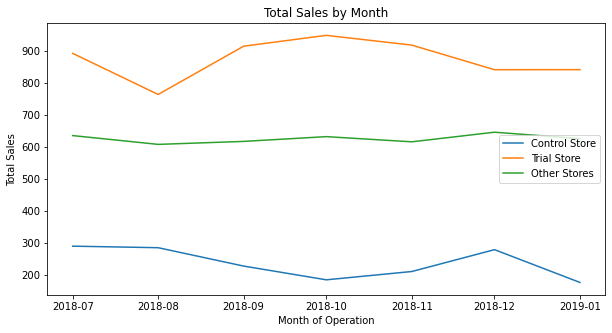

In [226]:
# Plot total sales by month for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(combineSalesPlot)
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

In [227]:
# Do the same for 'nCustomers' 

# First create relevant dataframes 
controlCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Control Store', ['TransactionMonth', 'Customers']]
controlCustomersPlot.set_index('TransactionMonth', inplace = True)
controlCustomersPlot.rename(columns = {'Customers': 'Control Store'}, inplace = True)
trialCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['TransactionMonth', 'Customers']]
trialCustomersPlot.set_index('TransactionMonth', inplace = True)
trialCustomersPlot.rename(columns = {'Customers': 'Trial Store'}, inplace = True)
otherCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Other Stores', ['TransactionMonth', 'Customers']]
otherCustomersPlot = pd.DataFrame(otherCustomersPlot.groupby('TransactionMonth').Customers.mean())
otherCustomersPlot.rename(columns = {'Customers': 'Other Stores'}, inplace = True)

# Concatenate
combineCustomersPlot = pd.concat([controlCustomersPlot, trialCustomersPlot, otherCustomersPlot], axis = 1)

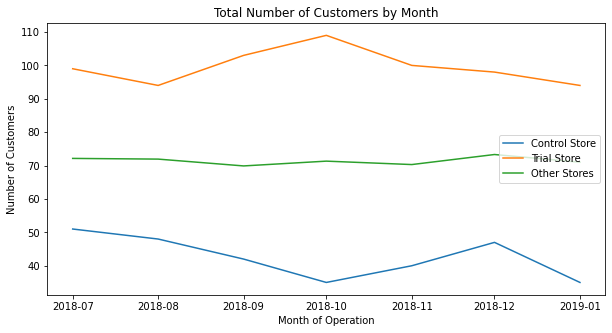

In [228]:
# Plot total number of customers for all 3 types of stores

plt.figure(figsize = (10, 5))
plt.plot(combineCustomersPlot)
plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(['Control Store', 'Trial Store', 'Other Stores'], loc = 5)

In [229]:
# First we need to work out a scaling factor to applied to the control store
# We compute this by dividing sum of 'totSales' for trial store by sum of 'totSales' for control store
# Let's call this variable 'scalingFactorSales'

trial_sum = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Trial Store' , 'Totsales'].sum()
control_sum = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Control Store', 'Totsales'].sum()
scalingFactorSales = trial_sum / control_sum

scaledControlSales = new_df
scaledControlSales = scaledControlSales.loc[scaledControlSales['STORE_NBR'] == control_store]
# Create 'controlSales' which applies 'scalingFactorSales' to 'totSales' column

scaledControlSales['controlSales'] = scaledControlSales['Totsales'] * scalingFactorSales

# Create 'percentageDiff' dataframe
percentageDiff = scaledControlSales[['Month_id', 'controlSales']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'totSales'
trialSales = new_df.loc[new_df['STORE_NBR'] == trial_store, 'Totsales']
trialSales.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialSales], axis = 1)
percentageDiff.rename(columns = {'Totsales': 'trialSales'}, inplace = True)

percentageDiff

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_18488/722050308.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['controlSales'] = scaledControlSales['Totsales'] * scalingFactorSales


,Month_id,controlSales,trialSales
0,201807,1071.840219,892.20
1,201808,1054.142135,764.05
2,201809,842.871256,914.60
3,201810,684.694629,948.40
4,201811,780.190541,918.00
5,201812,1031.650819,841.20
6,201901,654.460402,841.40
7,201902,899.652609,913.20
8,201903,734.101780,1026.80
9,201904,584.774196,848.20


In [230]:
percentageDiff['percentageDiff'] = abs(percentageDiff.controlSales - percentageDiff.trialSales) / percentageDiff.controlSales
stdDev = percentageDiff.loc[percentageDiff['Month_id'] < 201902, 'percentageDiff'].std()
scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['Month_id'].astype(str), format = '%Y%m')
controlSales = scaledControlSales.loc[:, ['TransactionMonth', 'controlSales']]
controlSales.set_index('TransactionMonth', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)
controlSales

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_18488/4224138392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales['TransactionMonth'] = pd.to_datetime(scaledControlSales['Month_id'].astype(str), format = '%Y%m')


,Control Sales
TransactionMonth,
2018-07-01,1071.840219
2018-08-01,1054.142135
2018-09-01,842.871256
2018-10-01,684.694629
2018-11-01,780.190541
2018-12-01,1031.650819
2019-01-01,654.460402
2019-02-01,899.652609
2019-03-01,734.101780


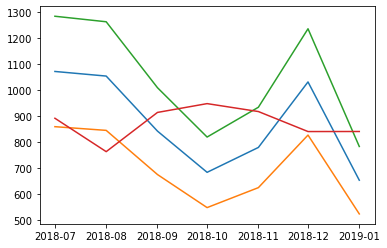

In [231]:
trialSales = pastSales.loc[pastSales['STORE_NBR'] == trial_store, ['TransactionMonth', 'Totsales']]
trialSales.set_index('TransactionMonth', inplace = True)
trialSales.rename(columns = {'Totsales': 'Trial Sales'}, inplace = True)

controlSales['Control 5% Confidence Interval'] = controlSales['Control Sales'] * (1 - stdDev*2)
controlSales['Control 95% Confidence Interval'] = controlSales['Control Sales'] * (1 + stdDev*2)
combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
plt.plot(combineSales)

In [232]:
# Now let's move on to 'nCustomers'
# First, compute scaling factor
# Let's call this variable 'scalingFactorCustomers'

trial_customers = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Trial Store' , 'Customers'].sum()
control_customers = preTrialMeasures.loc[preTrialMeasures['store_type'] == 'Control Store', 'Customers'].sum()
scalingFactorCustomers = trial_customers / control_customers
scalingFactorCustomers

2.338926174496644

In [233]:
scaledControlCustomers = pastSales
scaledControlCustomers = scaledControlCustomers.loc[scaledControlCustomers['STORE_NBR'] == control_store]
scaledControlCustomers['controlCustomers'] = scaledControlCustomers['Customers'] * scalingFactorCustomers
# Create 'percentageDiff' dataframe
percentageDiff = scaledControlCustomers[['Month_id', 'controlCustomers']]
percentageDiff.reset_index(drop = True, inplace = True)

# Concatenate with trial store 'nCustomers'
trialCustomers = new_df.loc[new_df['STORE_NBR'] == trial_store, 'Customers']
trialCustomers.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialCustomers], axis = 1)
percentageDiff.rename(columns = {'Customers': 'trialCustomers'}, inplace = True)

C:\Users\BOSSMA~1\AppData\Local\Temp/ipykernel_18488/1028515916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCustomers['controlCustomers'] = scaledControlCustomers['Customers'] * scalingFactorCustomers


In [234]:
percentageDiff['percentageDiff'] = abs(percentageDiff.controlCustomers - percentageDiff.trialCustomers) / percentageDiff.controlCustomers
stdDev = percentageDiff.loc[percentageDiff['Month_id'] < 201902, 'percentageDiff'].std()
# Time for some visualisation
# First we need to create the appropriate dataframe
# Extract 'controlCustomers' from 'scaledControlCustomers' dataframe for control store 

controlCustomers = scaledControlCustomers.loc[:, ['TransactionMonth', 'controlCustomers']]
controlCustomers.set_index('TransactionMonth', inplace = True)
controlCustomers.rename(columns = {'controlCustomers': 'Control Customers'}, inplace = True)

In [236]:
trialCustomers = pastSales.loc[pastSales['STORE_NBR'] == trial_store, ['TransactionMonth', 'Customers']]
trialCustomers.set_index('TransactionMonth', inplace = True)
trialCustomers.rename(columns = {'Customers': 'Trial Customers'}, inplace = True)
# Create two new columns under 'controlCustomers' which calculates the 5% and 95% confidence interval

controlCustomers['Control 5% Confidence Interval'] = controlCustomers['Control Customers'] * (1 - stdDev*2)
controlCustomers['Control 95% Confidence Interval'] = controlCustomers['Control Customers'] * (1 + stdDev*2)

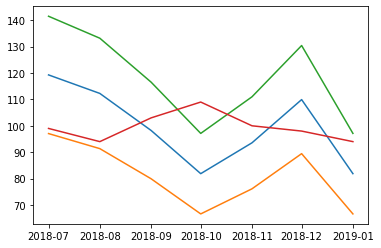

In [237]:
combineCustomers = pd.merge(controlCustomers, trialCustomers, left_index = True, right_index = True)
plt.plot(combineCustomers)

# INSIGHT
It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, sales were not significantly higher. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results.# 